In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from nbodykit.lab import *
from nbodykit import style, setup_logging

import matplotlib.pyplot as plt
import numpy as np
plt.style.use(style.notebook)

In [19]:
setup_logging() # turn on logging to screen

[ 000328.18 ]   0: 09-15 13:58  LogNormalCatalog INFO     Growth Rate is 0.871127
[ 000328.18 ]   0: 09-15 13:58  LogNormalCatalog INFO     Generating whitenoise
[ 000330.48 ]   0: 09-15 13:58  LogNormalCatalog INFO     Write noise generated
[ 000331.21 ]   0: 09-15 13:58  LogNormalCatalog INFO     Displacement computed in fourier space
[ 000331.59 ]   0: 09-15 13:58  LogNormalCatalog INFO     Overdensity computed in configuration space: std = 1.1366206910091434
[ 000332.65 ]   0: 09-15 13:58  LogNormalCatalog INFO     Displacement computed in configuration space: std = [3.4372799889642653, 3.419346123142709, 3.5134305759800415]
[ 000332.66 ]   0: 09-15 13:58  LogNormalCatalog INFO     gaussian field is generated
[ 000332.75 ]   0: 09-15 13:58  LogNormalCatalog INFO     Lognormal transformation done
[ 000333.45 ]   0: 09-15 13:58  LogNormalCatalog INFO     Poisson sampling done, total number of objects is 2997880
[ 000336.02 ]   0: 09-15 13:58  LogNormalCatalog INFO     catalog produce

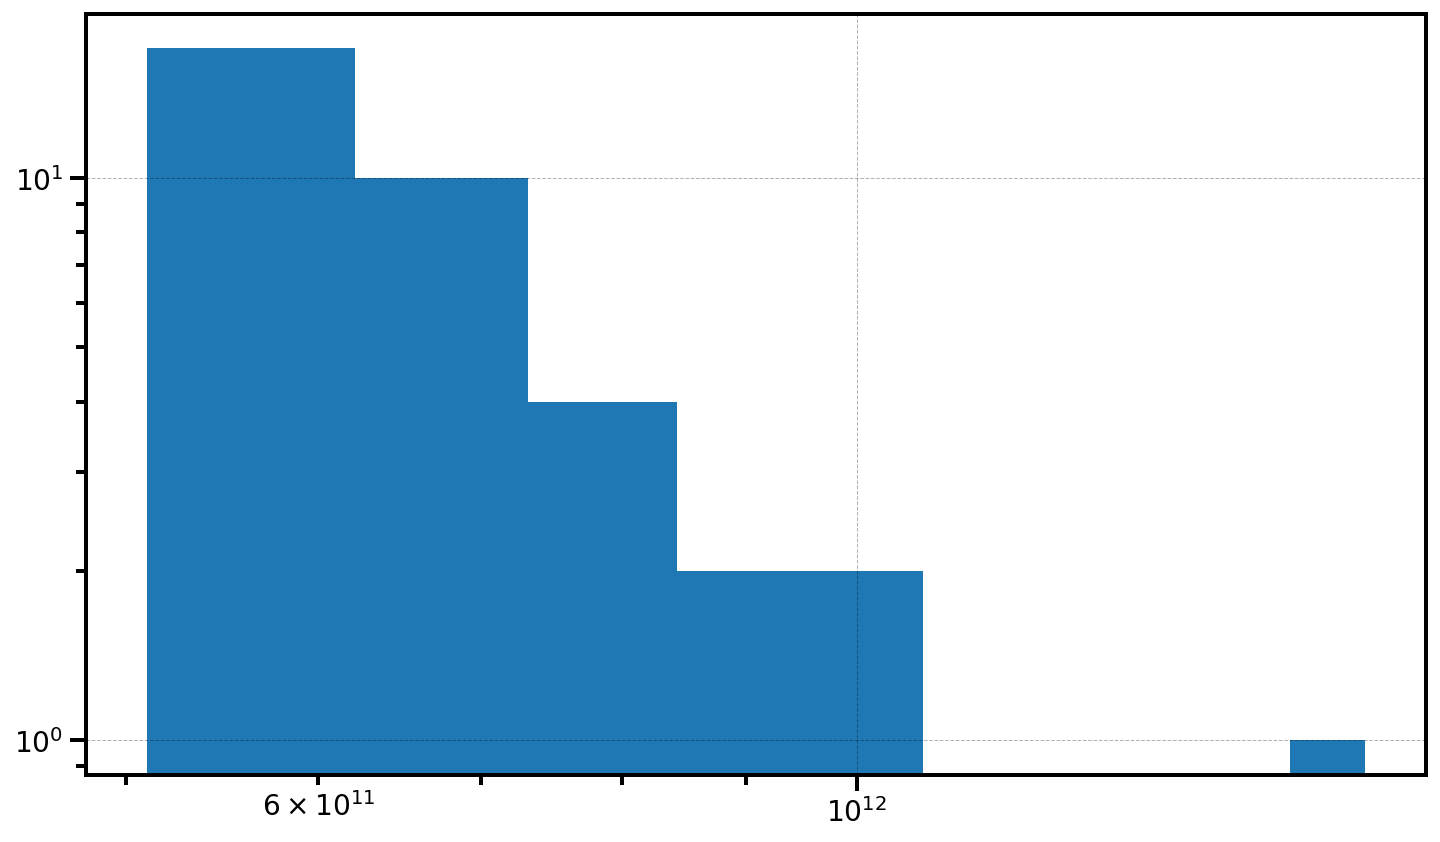

In [26]:
for redshift in np.array([1]):
    cosmo = cosmology.Planck15
    Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')
    b1 = 2.0
    cat = LogNormalCatalog(Plin=Plin, nbar=3e-3, BoxSize=1000., Nmesh=256, bias=b1, seed=42)
    fof = FOF(cat, linking_length=0.2, nmin=50)
    halos = fof.to_halos(1e10,cosmo,redshift)
    halotools_halos = halos.to_halotools()
    plt.hist(halotools_halos.halo_table['halo_mvir'])
    plt.xlabel('')
    plt.loglog()